# txtファイルの読み込み及びファイル作成のテスト

In [1]:
import os
import re
import matplotlib.pyplot as plt

In [2]:


# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src import OpenFile as of
from src import MSreader


In [3]:
# 出力用フォルダの作成
path_output_folder=of.make_folder("output")
path_output_folder


Folder 'output' already exists in '.'.


'.\\output'

In [4]:
# 入力ファイルの指定
path_input_folder="input"
name_input= "case60g02out.ms8"
path_input_data= os.path.join(path_input_folder, name_input)



In [5]:
#入力データのディレクトリ
# 現在のカレントディレクトリを取得します
directory_path = os.getcwd()
directory_path
shared_name="case60g02out"
shared_name

'case60g02out'

In [6]:
struct_name=shared_name+"S_00000"
struct_path=os.path.join(path_input_folder,struct_name)
struct_path

'input\\case60g02outS_00000'

In [7]:
filename_s=f"input\{shared_name}S_00000"

In [8]:
# 入力ファイルの読み込み
with open(path_input_data, "r") as f:
    data_txt = f.read()


In [9]:
#改行ごとに分割
list_preset, list_isteprow = MSreader.separate_stepblock(data_txt)
list_isteprow[0]

[' istep =      39890 time  =  5.618E-03',
 ' ----- maximum velocity data -----',
 'ulmax= 8.40072E+00 @(  28,   3, 324) vlmax= 7.96686E+00 @(  28,   1, 323) wlmax= 2.20888E+01 @(  30,   1, 330)',
 'ugmax= 8.40072E+00 @(  28,   3, 324) vgmax= 7.96686E+00 @(  28,   1, 323) wgmax= 2.20888E+01 @(  30,   1, 330)',
 ' ----- maximum and minimum data of pres.               and temp. -----',
 'pmax= 1.09070E+05 @(  37,   7,   5) pmin= 9.99419E+04 @(  34,   3, 474)',
 'tmax= 3.56895E+02 @(  33,   3, 325) tmin= 2.73150E+02 @(   1,   1,   3)',
 ' ----- maximum density of both phases -----',
 'r1max= 1.07437E+05 @(  25,  10, 144) r2max= 1.42601E+00 @(  16,   2, 136)',
 ' time step reduced by CSF limit',
 ' time step reduced by CSF limit',
 ' time step reduced by CSF limit',
 ' time step reduced by CSF limit',
 ' time step reduced by CSF limit',
 ' time step reduced by CSF limit',
 ' time step reduced by CSF limit',
 ' time step reduced by CSF limit',
 ' time step reduced by CSF limit',
 ' time ste

In [10]:
list_labels= [ ["time"], ["tmin", "tmax"], ["pmin", "pmax"], ["wlmax", "wgmax"] ]
list_labels_1d=[p for list_l in list_labels for p in list_l ]
list_labels_1d


['time', 'tmin', 'tmax', 'pmin', 'pmax', 'wlmax', 'wgmax']

In [11]:
list_istep=[]
list_time = []
list_wlmax=[]
list_wgmax=[]
list_pmax=[]
list_pmin=[]
list_tmax=[]
list_tmin=[]

for p in list_isteprow:
    list_value_i=[]
    istep = MSreader.extract_values(p, "istep")[0]

    
    for label in list_labels_1d:
        # print(label)
        list_value_i.append(MSreader.extract_values(p,label)[0])
    # print(list_value_i)

    if None in list_value_i :
        print("istep stopped at:", istep)
        break


    time_values = MSreader.extract_values(p,"time")

        
    list_istep.append(istep)
    list_time.append(list_value_i[0])
    list_tmin.append(list_value_i[1])
    list_tmax.append(list_value_i[2])
    list_pmin.append(list_value_i[3])
    list_pmax.append(list_value_i[4])
    list_wlmax.append(list_value_i[5])
    list_wgmax.append(list_value_i[6])

    # print("istep: ",istep)

istep stopped at: 172890


# その他のパラメータ抽出

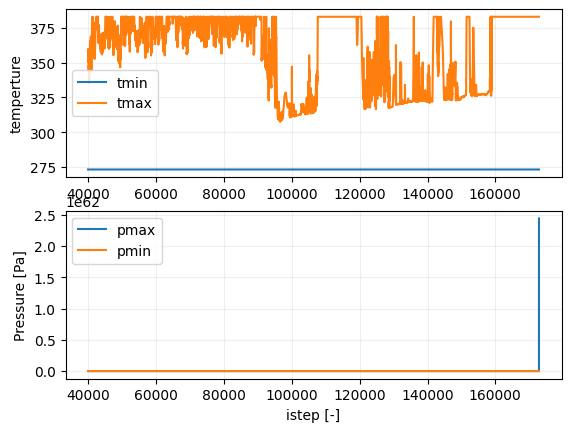

In [12]:

fig, ax = plt.subplots(2,1)
ax1=ax[0]
ax2=ax[1]

ax1.plot(list_istep,list_tmin,label='tmin')
ax1.plot(list_istep, list_tmax,label='tmax')
# ax1.set_title("IstepVsParameter")
# ax1.set_xlabel("istep [-]")
ax1.set_ylabel("temperture")
ax1.grid(alpha=0.2)
ax1.legend()

ax2.plot(list_istep,list_pmax,label='pmax')
ax2.plot(list_istep,list_pmin,label='pmin')
# ax2.set_title("IstepVsParameter")
ax2.set_xlabel("istep [-]")
ax2.set_ylabel("Pressure [Pa]")
ax2.grid(alpha=0.2)
ax2.legend()
plt.show()

time
tmin
tmax
pmin
pmax
wlmax
wgmax


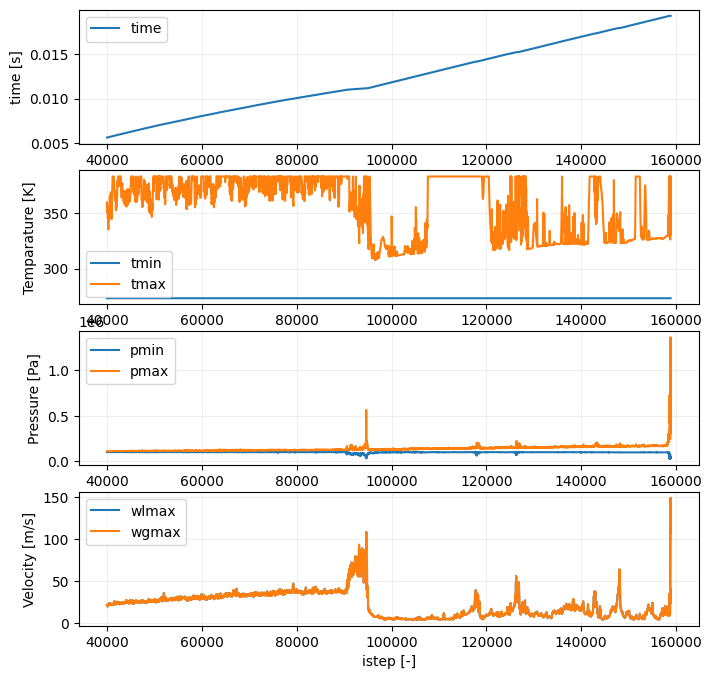

In [13]:
list_istep
list_values= [ [list_time],[list_tmin,list_tmax], [list_pmin,list_pmax], [list_wlmax, list_wgmax]]
list_labels= [ ["time"], ["tmin", "tmax"], ["pmin", "pmax"], ["wlmax", "wgmax"] ]
list_ylabel= [ "time [s]", "Temparature [K]", "Pressure [Pa]", "Velocity [m/s]" ]

range_istep=[0,-1400]

# パラメータの数だけグラフを作成
fig, ax = plt.subplots(len(list_values),1, figsize=(8,2*len(list_values)))

for i, (values,labels) in enumerate(zip(list_values,list_labels) ):
    is_dt=0
    j=i+is_dt
    ax_i= ax[j]

    ax_i.set_ylabel(list_ylabel[j])

    for (value,label) in zip(values,labels):
        print(label)
        ax_i.plot(list_istep[range_istep[0]:range_istep[1]],
                  value[range_istep[0]:range_istep[1]]
                  ,label=label)
        # ax_i.set_title("IstepVsParameter")
        # ax_i.set_xlabel("istep [-]")
        ax_i.grid(alpha=0.2)
        ax_i.legend()
    
    # if labels[0] == "time":
    #     is_dt =1
    #     list_istep_tmp =list_istep[1:]
    #     list_dt= np.diff( np.array(list_time) )
    #     ax_i.plot(list_istep_tmp[range_istep[0]:range_istep[1]],
    #         value[range_istep[0]:range_istep[1]]
    #         ,label=label)
    #     # ax_i.set_title("IstepVsParameter")
    #     # ax_i.set_xlabel("istep [-]")
    #     ax_i.grid(alpha=0.2)
    #     ax_i.legend()

    if i == len(list_values)-1 :
        ax_i.set_xlabel("istep [-]")
plt.show()

In [14]:
list_labels= [ ["tmin", "tmax"], ["pmin", "pmax"], ["wlmax", "wgmax"] ]
list_labels_1d=[p for list_l in list_labels for p in list_l ]
list_labels_1d

['tmin', 'tmax', 'pmin', 'pmax', 'wlmax', 'wgmax']

In [41]:
list_istep=[]
list_time = []
list_wlmax=[]
list_wgmax=[]
list_pmax=[]
list_pmin=[]
list_tmax=[]
list_tmin=[]

list_wlmax_posi=[]
list_wgmax_posi=[]
list_pmax_posi=[]
list_pmin_posi=[]
list_tmax_posi=[]
list_tmin_posi=[]


for p in list_isteprow:
    list_value_i=[]
    posi_i = []
    istep = MSreader.extract_values(p, "istep")[0]

    
    for label in list_labels_1d:
        # print(label)
        values_tmp, posi_tmp= MSreader.extract_values_with_posi(p,label)
        list_value_i.append(values_tmp[0])
        posi_i.append(posi_tmp[0])

    # print(list_value_i)

    if None in list_value_i :
        print("istep stopped at:", istep)
        break

    
    time_values = MSreader.extract_values(p,"time")[0]

        
    list_istep.append(istep)
    list_time.append(time_values)
    list_tmin.append(list_value_i[0])
    list_tmax.append(list_value_i[1])
    list_pmin.append(list_value_i[2])
    list_pmax.append(list_value_i[3])
    list_wlmax.append(list_value_i[4])
    list_wgmax.append(list_value_i[5])

    list_tmin_posi.append(posi_i[0])
    list_tmax_posi.append(posi_i[1])
    list_pmin_posi.append(posi_i[2])
    list_pmax_posi.append(posi_i[3])
    list_wlmax_posi.append(posi_i[4])
    list_wgmax_posi.append(posi_i[5])


    # print("istep: ",istep)

istep stopped at: 172890


In [42]:
len(list_pmax_posi)

13300

In [43]:
import struct
import numpy as np
import os
import re
import matplotlib
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import interp1d



import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid


In [44]:
from src import OpenFile
from src.GridBuilder import interpolate_grid, read_grid_from_bi

In [45]:
#座標データ抽出
points = read_grid_from_bi(path_input_folder, shared_name)

x_points=points[0][1:-1]
y_points=points[1][1:-1]
z_points=points[2][1:-1]
x_points.shape,y_points.shape,z_points.shape

((60,), (60,), (472,))

In [46]:
data_shape=(points[0].shape[0],points[1].shape[0],points[2].shape[0])
data_shape

(62, 62, 474)

# 座標点の計算

In [60]:
# 該当する座標店の表示
x,y,z = np.meshgrid(points[0],points[1],points[2], indexing='ij')

target_list = list_pmax_posi
print(target_list)
array_x=np.array([x[p] for p in target_list])
array_y=np.array([y[p] for p in target_list])
array_z=np.array([z[p] for p in target_list])
array_c=np.array(list_istep)
array_x,array_y,array_z

[(36, 6, 4), (32, 6, 3), (32, 6, 3), (32, 5, 2), (32, 5, 2), (32, 4, 2), (32, 4, 2), (21, 11, 3), (22, 5, 3), (22, 5, 3), (22, 5, 3), (22, 5, 3), (22, 5, 3), (22, 5, 3), (22, 5, 3), (22, 5, 3), (35, 7, 4), (35, 7, 4), (35, 7, 4), (39, 13, 2), (39, 13, 2), (39, 13, 2), (39, 13, 2), (39, 13, 2), (39, 13, 2), (40, 13, 2), (40, 13, 2), (40, 13, 2), (25, 6, 3), (25, 5, 3), (25, 5, 3), (33, 8, 4), (33, 8, 4), (33, 8, 4), (33, 8, 4), (25, 6, 3), (25, 5, 3), (25, 5, 3), (34, 8, 3), (39, 12, 2), (40, 12, 2), (40, 12, 2), (37, 5, 4), (37, 5, 4), (37, 5, 4), (37, 5, 4), (37, 5, 3), (36, 6, 3), (28, 5, 3), (23, 7, 4), (23, 7, 4), (23, 7, 4), (23, 8, 4), (23, 8, 4), (23, 8, 4), (23, 8, 4), (38, 11, 3), (38, 11, 3), (38, 11, 3), (38, 11, 3), (38, 11, 3), (38, 11, 3), (38, 11, 3), (38, 11, 3), (38, 11, 2), (38, 11, 2), (38, 11, 2), (20, 2, 2), (20, 1, 2), (20, 1, 2), (20, 1, 2), (20, 1, 2), (20, 1, 2), (19, 1, 2), (19, 1, 2), (19, 1, 2), (19, 1, 2), (19, 1, 2), (19, 1, 2), (19, 1, 2), (19, 1, 2), (19

(array([ 2.750e-04,  7.500e-05,  7.500e-05, ..., -1.075e-03, -1.125e-03,
        -1.075e-03]),
 array([-0.001225, -0.001225, -0.001225, ..., -0.000825, -0.000875,
        -0.001225]),
 array([0.000175 , 0.000125 , 0.000125 , ..., 0.0113625, 0.0113375,
        0.0114125]))

# 流路の描画

In [61]:
data_s_origin=np.array(OpenFile.get_data_from_binary(filename_s)) 
data_s_origin

array([0., 0., 0., ..., 0., 0., 0.])

In [62]:
#流路情報の抽出
data_s = data_s_origin.reshape(data_shape, order="F")[1:-1,1:-1, 1:-1]
data_s.shape

(60, 60, 472)

In [63]:
# 格子幅そろえる処理
delta=0.1*10**-3
X,Y,Z, data_s_ip=interpolate_grid(x_points,y_points,z_points,data_s,delta)
data_shape_after=data_s_ip.shape
data_shape_after

(30, 30, 200)

In [64]:
verts, faces, normals, values = measure.marching_cubes(data_s_ip, 0.5,spacing=(delta,delta,delta))
verts.shape,faces.shape

((13620, 3), (27184, 3))

In [65]:
#等値面の原点地点にoffsetを掛ける
cube_offset=np.array([[np.min(x_points),np.min(y_points),np.min(z_points)]])
verts+cube_offset,cube_offset

(array([[-0.001425  , -0.000375  ,  0.003825  ],
        [-0.001375  , -0.00045404,  0.003825  ],
        [-0.001375  , -0.000375  ,  0.003775  ],
        ...,
        [ 0.001375  ,  0.000325  ,  0.012225  ],
        [ 0.001375  ,  0.000325  ,  0.012325  ],
        [ 0.001375  ,  0.000325  ,  0.012425  ]]),
 array([[-1.475e-03, -1.475e-03,  2.500e-05]]))

# 流路の描画

In [66]:
data_s_origin=np.array(OpenFile.get_data_from_binary(filename_s)) 
data_s_origin

array([0., 0., 0., ..., 0., 0., 0.])

In [67]:
#流路情報の抽出
data_s = data_s_origin.reshape(data_shape, order="F")[1:-1,1:-1, 1:-1]
data_s.shape

(60, 60, 472)

In [68]:
# 格子幅そろえる処理
delta=0.1*10**-3
X,Y,Z, data_s_ip=interpolate_grid(x_points,y_points,z_points,data_s,delta)
data_shape_after=data_s_ip.shape
data_shape_after

(30, 30, 200)

In [69]:
verts, faces, normals, values = measure.marching_cubes(data_s_ip, 0.5,spacing=(delta,delta,delta))
verts.shape,faces.shape

((13620, 3), (27184, 3))

In [70]:
#等値面の原点地点にoffsetを掛ける
cube_offset=np.array([[np.min(x_points),np.min(y_points),np.min(z_points)]])
verts+cube_offset,cube_offset

(array([[-0.001425  , -0.000375  ,  0.003825  ],
        [-0.001375  , -0.00045404,  0.003825  ],
        [-0.001375  , -0.000375  ,  0.003775  ],
        ...,
        [ 0.001375  ,  0.000325  ,  0.012225  ],
        [ 0.001375  ,  0.000325  ,  0.012325  ],
        [ 0.001375  ,  0.000325  ,  0.012425  ]]),
 array([[-1.475e-03, -1.475e-03,  2.500e-05]]))

# 座標および流路の可視化

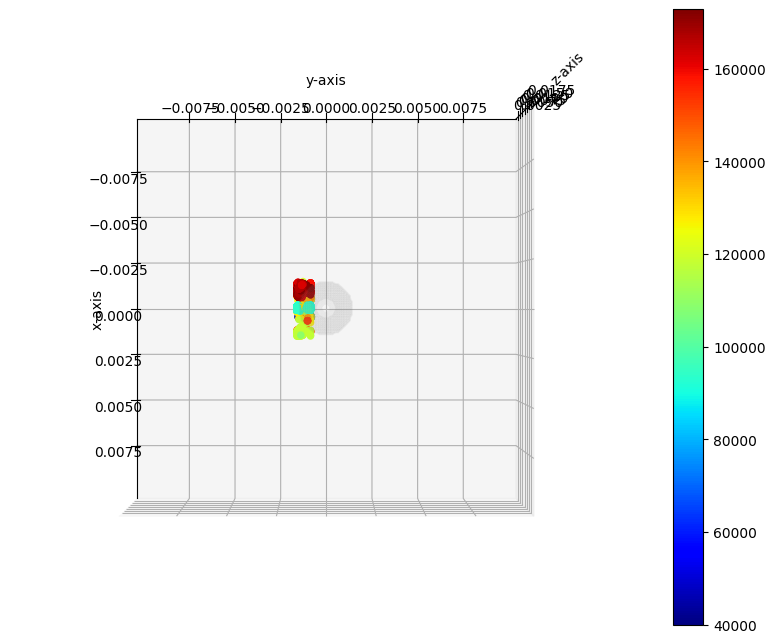

In [71]:
colormap = plt.get_cmap('jet')
norm = matplotlib.colors.Normalize(vmin=0, vmax=np.max(array_c))

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection = '3d')


ax_scatter_obj = ax.scatter(array_x, array_y, array_z, s = 20, c = array_c, cmap = colormap)
fig.colorbar(ax_scatter_obj)



# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces]+cube_offset,alpha=0.1, facecolors='gray')
# mesh.set_edgecolor('')
# https://qiita.com/taiko1/items/23379266c1aaa2e67acc

ax.add_collection3d(mesh)

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() * 0.5

#軸スケール一定
mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

# 真正面から見るための視点を設定する
ax.view_init(elev = 90, azim = 0)# elevは仰角（上下の角度）、azimは方位角（左右の角度）


plt.show()

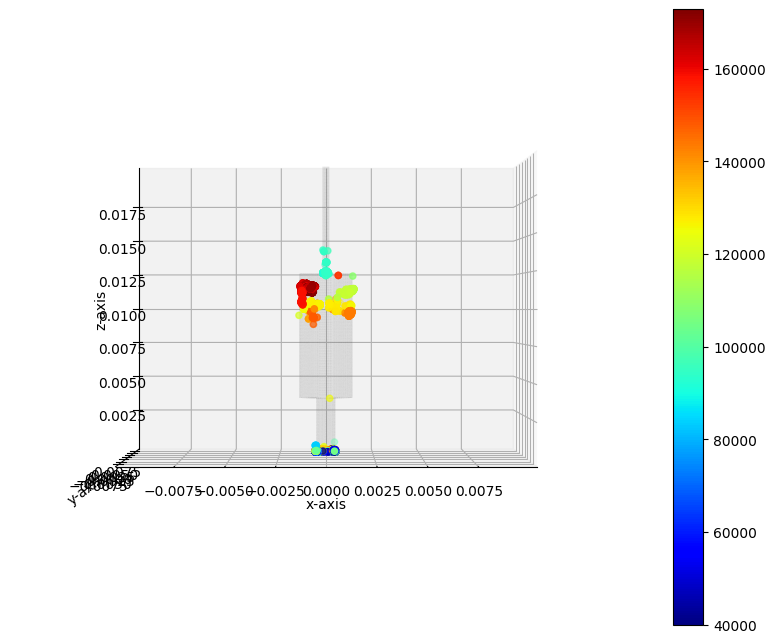

In [72]:
colormap = plt.get_cmap('jet')
norm = matplotlib.colors.Normalize(vmin=0, vmax=np.max(array_c))

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection = '3d')


ax_scatter_obj = ax.scatter(array_x, array_y, array_z, s = 20, c = array_c, cmap = colormap)
fig.colorbar(ax_scatter_obj)



# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces]+cube_offset,alpha=0.1, facecolors='gray')
# mesh.set_edgecolor('')
# https://qiita.com/taiko1/items/23379266c1aaa2e67acc

ax.add_collection3d(mesh)

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() * 0.5

#軸スケール一定
mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

# 真正面から見るための視点を設定する
ax.view_init(elev = 0, azim = -90)# elevは仰角（上下の角度）、azimは方位角（左右の角度）


plt.show()